# Dicussion on Overfitting

Today, we'll discuss overfitting. Overfitting can occur when your model has too much complexity, or is too powerful. Then, your model can learn some of the random "noise" in the dataset, which are remnant patterns which are not generalizable. This can happen for any model, for example for polynomails when you have too high of a degree, and neural networks when you have too many neurons.

Below we can see what overfitting may look like with polynomials:

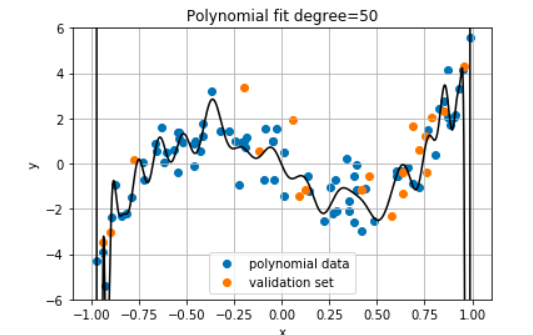

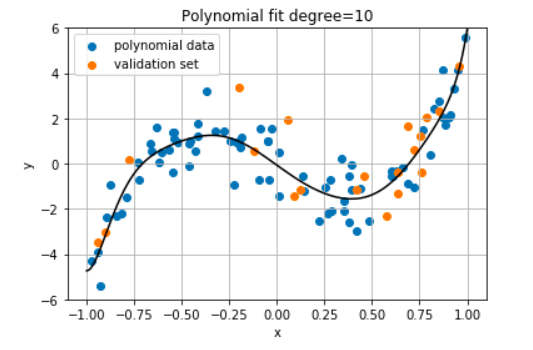

So now that we’ve seen the concept of overfitting on a simple 2 dimensional example, let’s see an example of overfitting in action. We’ll see what overfitting may look like with neural networks. For this, we'll be using the [Beijing Air Quality Dataset](https://github.com/PhilChodrow/PIC16B/blob/master/discussion/PRSA_Data_20130301-20170228.zip?raw=true) that we've used before, and we'll be trying to predict an air quality value using some of the other features.

Let's first mount our Google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd "/content/gdrive/MyDrive/"

Now, with neural networks, we often want to use the GPU runtime on Colab to speed up training. You can do this by going to Runtime -> Change runtime type, and then choosing GPU for your hardware accelerator.

Now, let's import our libaries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import glob
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'      # 3 = INFO, WARNING, and ERROR messages are not printed
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["KMP_WARNINGS"] = "FALSE"            # Removes a lot of GPU debug messages that are not needed


And let's load our data. I also do some data cleaning here, such as standardization and encoding.

In [ ]:
path = r'/content/gdrive/MyDrive/PRSA_Data_20130301-20170228/' # use the path to your unzipped data
all_files = glob.glob(path + "/*.csv")

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)

Now let's create our model:

In [ ]:
def create_model(input_size):

Now let's fit our model:

And plot the loss:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.ylim([0, 0.5])
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()

Our training loss is always decreasing, which is good. This suggests our model is at least learning the relationships in the training data. However, we see that eventually our validation set accuracy stops decreasing. At this point, the patterns we are learning aren't "generalizable" anymore, we are learning some of the spurious patterns in the training set.

To address this, as in our polynomial examples above, we actually want to give our model less firepower. Let's try to do this below:

In [ ]:
def create_model_dropout(input_size):

Let's build our model, fit it, and plot the loss:

Our model trains really smoothly, and seems to not overfit anymore, as the validation loss is always decreasing. If you're satisfied with the performance of your model, you can now see how well it does on the test set:

In [ ]:
predictions = model_with_dropout.predict(x_test)

rel_error = (np.mean(np.abs(predictions - y_test))/np.mean(np.abs(y_test)))
rel_accuracy = 1-rel_error
rel_accuracy

So our model does pretty well. It's not the absolute best, we could tweak it a little bit more to get a better accuracy if we wanted to, for example by training for longer, but we won't do that for now.

Now that we are satisfied with our model, we can save our parameters:

In [ ]:
model_with_dropout.save(r'/content/gdrive/MyDrive/my_model')

Wherever we are, we can load our model back up without having to rerun everything:

In [ ]:
import tensorflow as tf

reconstructed_model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/my_model')

predictions = reconstructed_model.predict(x_test)
rel_error = (np.mean(np.abs(predictions - y_test))/np.mean(np.abs(y_test)))
rel_accuracy = 1-rel_error
rel_accuracy